<div class="alert alert-block" style="color: skyblue">
    <h1><center> DAKD 2024 EXERCISE 3: UNSUPERVISED LEARNING  </center></h1>

### <font color = skyblue> *** FILL YOUR INFORMATION BELOW *** </font>
Niko Itänen <br>
2110412 <br>
nmitan@utu.fi  <br>
(Date)  <br>

___
#### General Guidance for Exercises

- **Complete all tasks**: Make sure to answer all questions, even if you cannot get your script to fully work.
- **Code clarity**: Write clear and readable code. Include comments to explain what your code does.
- **Effective visualizations**: Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- **Notebook organization**: You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- **Submission**: Submit both the `.ipynb` and `.html` or `.pdf` versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- **Grading criteria**:
    - The grading scale is *Fail/Pass/Pass with honors* (+1).
    - To pass, you must complete the required parts 0-3.
    - To achieve *Pass with honors*, complete the bonus exercises.
- **Technical issues**:
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at konsta.k.nyman@utu.fi or antti.s.vasankari@utu.fi.
- **Use of AI and large language models**:
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- **Time management**: Do not leave your work until the last moment. No feedback will be available during weekends.

**Additional Notes**:
- You can find the specific deadlines and session times for each assignment on the Moodle course page.
- Ensure all your answers are concise—typically a few sentences per question.
- Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
<br><br>
___

#### Exercise instructions

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the seeds dataset, available on moodle as `seeds.csv`. The features are all numeric. They quantify the measurements related to the geometrical properties of wheat grains. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)

<br>


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods. **REMEMBER, this step can never be neglected in the real world.** <br><br>
___

#### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [120]:
from itertools import product # has some utilities that may be useful in the exercise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the **Moodle** page of this course. (`seeds.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [121]:
# Load the data.
data = pd.read_csv('seeds.csv')

# Create a dataframe of seeds.
seeds = data[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coef', 'length_groove']]

# Prints
print(seeds.head(5)) # Display the first few rows of the dataframe.
print(seeds.describe()) # Display some statistics of the data.
print(seeds.dtypes) # Check the data types of the columns to see they are numeric.

    area  perimeter  compactness  length  width  asymmetry_coef  length_groove
0  18.45      16.12       0.8921   6.107  3.769           2.235          5.794
1  11.41      12.95       0.8560   5.090  2.775           4.957          4.825
2  10.79      12.93       0.8107   5.317  2.648           5.462          5.194
3  18.14      16.12       0.8772   6.059  3.563           3.619          6.011
4  15.38      14.90       0.8706   5.884  3.268           4.462          5.795
             area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.870999    5.628533    3.258605   
std      2.909699    1.305959     0.023629    0.443063    0.377714   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.270000   13.450000     0.856900    5.262250    2.944000   
50%     14.355000   14.320000     0.873450    5.523500    3.237000   
75%     17.305000   15.715000     0.

### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Explain briefly why this is important.
 - For visualization, project the data to two dimensions by using principal component analysis (PCA).
 - **These PCs are solely used for plotting the data.** The clusterings are done on the original standardized features.

In [122]:
# Z-score standardize the data.
scaler = StandardScaler()
seeds_standardized = scaler.fit_transform(seeds)

# Check the data values from the first 2 rows to see standardization worked.
print(seeds_standardized[:2])

# Do the PCA with 2 components to make it two-dimensional.
pca = PCA(n_components=2)
seeds_2d = pca.fit_transform(seeds_standardized)

[[ 1.24105062  1.19792729  0.89514907  1.08248588  1.35450161 -0.97681824
   0.78711311]
 [-1.18422463 -1.23520832 -0.63625821 -1.21838107 -1.28340427  0.83788114
  -1.18919199]]


<div style="color: skyblue">
Standardization is important because different features in the data may have different scales and we want to make sure they are comparable. For example, we cannot directly compare surface area and density based on their raw values. Instead, we want to standardise these values to tell us their significance within their own set. Because unsupervised learning methods rely heavily on distances and directions in the data, standardization becomes really important.

 - Visualize the resulting two-dimensional data in a scatter plot.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

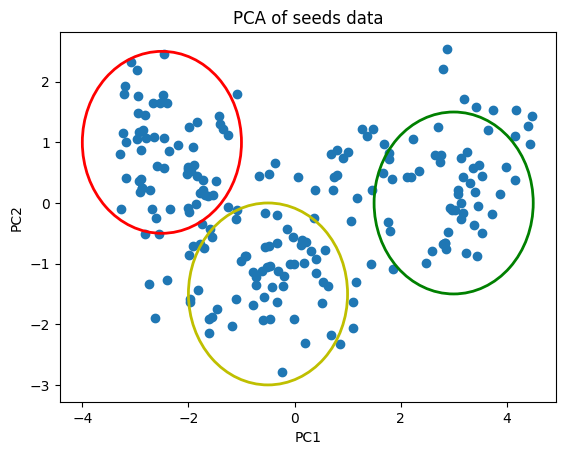

In [123]:
# Plot the scatter plot of the data in 2D.
plt.scatter(seeds_2d[:, 0], seeds_2d[:, 1])

# Draw ellipses around the clusters.
ellipse1 = Ellipse(xy=(-2.5, 1), width=3, height=3, edgecolor='r', fc='None', lw=2)
ellipse2 = Ellipse(xy=(-0.5, -1.5), width=3, height=3, edgecolor='y', fc='None', lw=2)
ellipse3 = Ellipse(xy=(3, 0), width=3, height=3, edgecolor='g', fc='None', lw=2)

# Add the ellipse to the plot.
plt.gca().add_patch(ellipse1)
plt.gca().add_patch(ellipse2)
plt.gca().add_patch(ellipse3)

# Add labels to the points.
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of seeds data')
plt.show()

There is some accumulation visible in certain areas of the plot, but the clusters are not very distinct or drastic. However, based on the distribution of data points, I think there are three cluster, which I have highlighted with drawn ellipses in the plot above.

### Part 2a: Agglomerative hierarchical clustering theory
Explain briefly the different linkage criterion values.
- Single: <p style="color: skyblue;"> In the single linkage method, the distances between two clusters is defined by the shortest distance between any pair of points from each cluster. It produces long, chain-like clusters as it merges the closest points first. [1], [2]</p>
- Average: <p style="color: skyblue;"> In average linkage method, we calculate the distance between two clusters as the average distance between all pairs of points from the two clusters. This method provides a balance between single and complete linkage and it is less sensitive to outliers. [1], [2]</p>
- Complete: <p style="color: skyblue;"> In the complete linkage method, we calculate the distance between two clusters from the longest distance to any pair of points from each clusters. It produces more compact clusters compared to single and average linkage, as it ensures that the clusters are merged only when all points are close to each other. [1], [2]</p>
- Ward: <p style="color: skyblue;">Lastly, Ward's method minimizes the total within-cluster variance when merging clusters. Unlike the complete linkage method, the distance between two clusters is measured by the increased in the total within-cluster variance after merging. This method creates clusters of roughly equal size and is useful when the goal is reduce variance within clusters. [1]</p>

Explain the **silhouette coefficient** (silhouette_score).

<div style="color: skyblue;">
The silhouette coefficient is a measure that we can use to evaluate the quality of clusters in clustering algorithms such as k-means or hiearcial clustering. The idea is that we calculate a score on how similar each point is to its own cluster compared to other clusters.

For a given data i, we calculate following quantities:
- **Cohesion**, which is the average distance between point i and all other points in the same cluster.
- **Separation**, which is the average distance between points i and all points in the nearest neighboring cluster.

The silhouette score for point i is given by formula:

$s(i) = {b(i) - a(i)\over max(a(i),b(i))}$

Where:

$a(i)$ is the cohession,

$b(i)$ is the separation.

[3], [4]

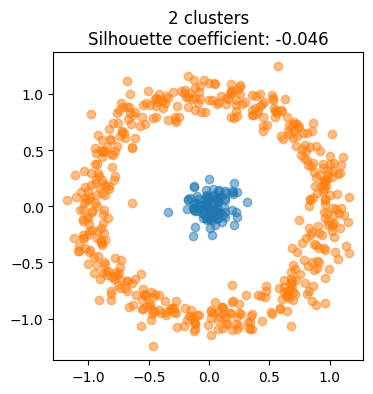

In [124]:
n = 2
no_in = 100
no_out = 500
labels = np.concatenate((np.zeros(no_in), np.ones(no_out)))

inner_cluster = np.random.randn(no_in, 2)*0.1
theta = np.linspace(0, 2*np.pi, no_out)
outer_cluster = np.array([np.cos(theta), np.sin(theta)]).T + np.random.randn(no_out, 2)*0.1
data = np.vstack((inner_cluster, outer_cluster))

score = silhouette_score(data, labels)

plt.figure(figsize=(4, 4))
plt.title(f'{n} clusters\nSilhouette coefficient: {score:.3f}')
for c in range(n):
    plt.scatter(data[labels==c, 0], data[labels==c, 1], alpha=0.5)
    
plt.show()

In the figure above, why is the silhouette coefficient close to zero even though the clusters are clearly distinct?
 
(Optional) What would be a better way to assess this clustering?

 <div style="color: skyblue;">

I believe that the presence of boundary points with small silhouette values can reduce the overall value of the silhouette coefficient. Also, the geometry of a circular outer cluster may cause more variation in distances, which may lower the score. Although the orange cluster forms an almost perfect circle with a well-defined centre and a uniform distribution of points, the uniformity does not guarantee a high silhouette score. This is because the silhouette metric depends on the distances between the inner and outer faces of the cluster, and the circular shape might lead to smaller differences in cohession and separation. [4]

I think Davies Boulding Scoring or Calisnki Harabasz Scoring could be worth trying in this case to make this clustering better. Davies-Bouldin score considers the ratio of inner and outer cluster distance. Calinski Harabasz score, on the other hand, evaluates the ratio of the sum of between cluster dispersion to within cluster dispersion. [5], [6]

### Part 2b: Agglomerative hierarchical clustering practice

Let's get back to the **seeds** dataset.

Cluster the standardized data into 2-10 clusters using agglomerative hierarchical clustering.
- Explore all combinations of the **number of clusters** (2-10) and the **linkage criteria**.
- Calculate the silhouette coefficient for each combination and store the results, as well as the predictions made by the clustering.

*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

In [125]:
# Define the number of clusters.
num_clusters = range(2, 11) # 2 to 10 clusters.
linkages = ['single', 'average', 'complete', 'ward']

# Create a Cartesian product of the number of clusters and the linkage methods.
combinations = list(product(num_clusters, linkages))

# Create arrays to store the results.
results = []
predictions = {}

# Perform the clustering and calculation for the silhouette scores.

for num_clusters, linkages in combinations:
    # Perform the clustering.
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkages)
    cluster_labels = clustering.fit_predict(seeds_standardized)

    # Compute the silhouette score.
    if len(cluster_labels) > 1:
        silhouette = silhouette_score(seeds_standardized, cluster_labels)
    else:
        silhouette = -1
    
    # Store results.
    results.append({'n_clusters': num_clusters, 'linkage': linkages, 'silhouette': silhouette})
    predictions[(num_clusters, linkages)] = cluster_labels

# Convert the results to a DataFrame.
results = pd.DataFrame(results)
print(results)

print(len(predictions[(2, 'ward')]))

    n_clusters   linkage  silhouette
0            2    single    0.056230
1            2   average    0.441339
2            2  complete    0.451995
3            2      ward    0.461297
4            3    single   -0.005642
5            3   average    0.375957
6            3  complete    0.350198
7            3      ward    0.392634
8            4    single   -0.082753
9            4   average    0.354864
10           4  complete    0.314857
11           4      ward    0.300576
12           5    single   -0.094596
13           5   average    0.275231
14           5  complete    0.293720
15           5      ward    0.274639
16           6    single   -0.229386
17           6   average    0.290306
18           6  complete    0.217380
19           6      ward    0.214959
20           7    single   -0.269912
21           7   average    0.268883
22           7  complete    0.219150
23           7      ward    0.232041
24           8    single   -0.276051
25           8   average    0.270292
2

- Use the silhouette score to determine the best linkage criterion for each number of clusters (2-10).
- For each number of clusters, display the best linkage criterion and the silhouette score, sorted by the score (high to low) as follows:

| Number of clusters | Linkage criterion | Silhouette score
| --- | --- | ---   

In [126]:
# Group results by number of clusters.
best_linkages = results.groupby('n_clusters', group_keys=False).apply(lambda x: x.loc[x['silhouette'].idxmax()])

# Select the best linkage method for each number of clusters.
best_linkages = best_linkages[['n_clusters', 'linkage', 'silhouette']]

# Rename the columns for better readability.
best_linkages.columns = ['Number of clusters', 'Linkage method', 'Silhouette score']

# For some reason there was n_clusters column in the results, so I reset the index.
best_linkages = best_linkages.reset_index(drop=True)

# Sort by silhouette score.
best_linkages = best_linkages.sort_values(by='Silhouette score', ascending=False)

# Print the result without the index.
best_linkages

C:\Users\itane\AppData\Local\Temp\ipykernel_18056\3004174671.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_linkages = results.groupby('n_clusters', group_keys=False).apply(lambda x: x.loc[x['silhouette'].idxmax()])


,Number of clusters,Linkage method,Silhouette score
0,2,ward,0.461297
1,3,ward,0.392634
2,4,average,0.354864
3,5,complete,0.293720
4,6,average,0.290306
7,9,average,0.279423
6,8,average,0.270292
5,7,average,0.268883
8,10,average,0.257456


 - Plot four clusterings with **three clusters**, one of each **linkage criterion**, as scatter plots.
 - Again, use the first two PCs for visualization. 
 - Colour the datapoints according to the clusters they were assigned to.
 - The structure of the plot is provided

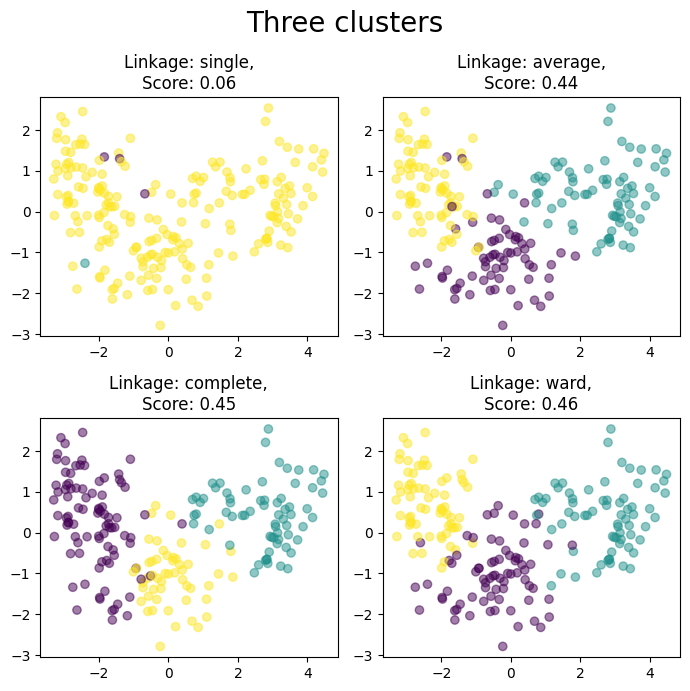

In [127]:
# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Three clusters", fontsize=20)

linkages = ['single', 'average', 'complete', 'ward']

axes = axes.flatten() # creates a single array from a 2D-matrix

for i, ax in enumerate(axes):
    ax.scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=predictions[(3, linkages[i])], alpha=0.5)
    ax.set_title(f"Linkage: {linkages[i]},\nScore: {results['silhouette'][i]:.2f}")

plt.tight_layout()

 - Similarly, from the clusterings using **'ward'** linkage criterion, plot the four clusterings of best performing **number of clusters** as scatter plots.

C:\Users\itane\AppData\Local\Temp\ipykernel_18056\377002608.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_ward = results.groupby('n_clusters', group_keys=False).apply(lambda x: x.loc[x['linkage'] == 'ward'])


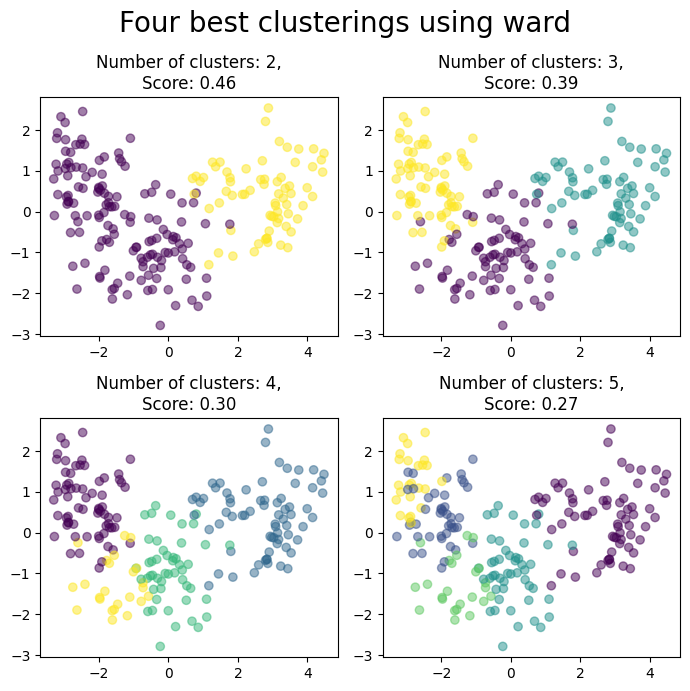

In [128]:
# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Four best clusterings using ward", fontsize=20)

# Group the best ward linkage results from the results dataframe
best_ward = results.groupby('n_clusters', group_keys=False).apply(lambda x: x.loc[x['linkage'] == 'ward'])

# Reset the indices
best_ward = best_ward.reset_index(drop=True)

axes = axes.flatten() # creates a single array from a 2D-matrix

for i, ax in enumerate(axes):
    ax.scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=predictions[(best_ward['n_clusters'][i], 'ward')], alpha=0.5)
    ax.set_title(f"Number of clusters: {best_ward['n_clusters'][i]},\nScore: {best_ward['silhouette'][i]:.2f}")

plt.tight_layout()

Think about the clusters you see and how the choice of the linkage criterion and the number of clusters affected the formation of clusters. No need to write an answer.

Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? Which ones? It's absolutely fine if they don't.

<div style="color: skyblue;">
Since I marked three different clusters in Part 1, I would say that these ellipses were used quite well there. Especially when you look at the three cluster divisions, they perform pretty much the same way that I did in my own observations. The only time the clustering worked differently was when we used single linkage clustering. When we look at the three clusters with single linkage clustering, we see that there is a lot of yellow. But as we can see, the coefficient value was only 0.06, which is really low. So I would say that I made good observations before this exercise.

### Part 3: _k_-means clustering

- Perform _k_-means clustering on the standardized data. Try 2-10 numbers of clusters.
- Evaluate the clustering performance using the silhouette coefficient.
- Store the centroids of the clusters

In [129]:
# Define the amount of clusters again to make sure it is correct.
num_clusters = range(2, 11) # 2 to 10 clusters.

# Let's perform the k-means clustering now
silhouette_scores = []
cluster_centrals = []

for n_cluster in num_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=111)
    kmeans.fit(seeds_standardized)

    # Get the cluster labels
    cluster_labels = kmeans.labels_

    # Compute the silhouette score
    score = silhouette_score(seeds_standardized, cluster_labels)
    silhouette_scores.append(score)

    # Store central points of the clusters
    cluster_centrals_value = kmeans.cluster_centers_

    # PCA the central poitns
    pca = PCA(n_components=2)
    cluster_centrals_2d = pca.fit_transform(kmeans.cluster_centers_)
    cluster_centrals.append(cluster_centrals_2d)


results = pd.DataFrame({'n_clusters': num_clusters, 'silhouette': silhouette_scores})
print(results)

   n_clusters  silhouette
0           2    0.461466
1           3    0.400727
2           4    0.332125
3           5    0.278097
4           6    0.272406
5           7    0.247681
6           8    0.260849
7           9    0.249994
8          10    0.263954


 - Choose the four best numbers of clusters according to silhouette coefficient that you discovered above.
 - Once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot.
 - Remember to transform the centroids to the PCA space.
 - Explain why you need to transform the centroids.

<div style="color: skyblue;">
YOUR ANSWER

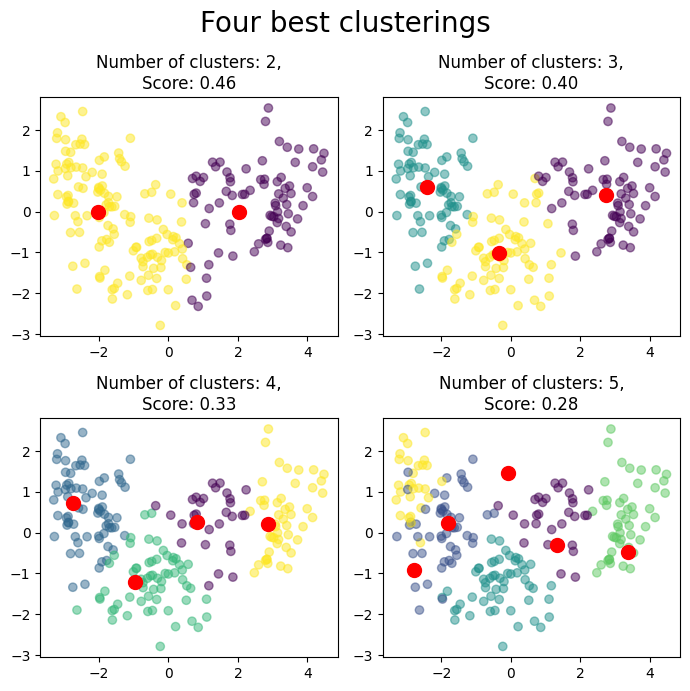

In [130]:
# Use the four best clusterings from the results dataframe and plot them
best_kmeans = results.nlargest(4, 'silhouette')

# Reset the indices
best_kmeans = best_kmeans.reset_index(drop=True)

# outline for the plots
fig, axes = plt.subplots(2,2, figsize=(7,7))
fig.suptitle("Four best clusterings", fontsize=20)


axes = axes.flatten() # creates a single array from a 2D-matrix

for i, ax in enumerate(axes):
    ax.scatter(seeds_2d[:, 0], seeds_2d[:, 1], c=KMeans(n_clusters=best_kmeans['n_clusters'][i], random_state=111).fit_predict(seeds_standardized), alpha=0.5) # clusters
    ax.scatter(cluster_centrals[i][:, 0], cluster_centrals[i][:, 1], c='red', s=100) # centers
    ax.set_title(f"Number of clusters: {best_kmeans['n_clusters'][i]},\nScore: {best_kmeans['silhouette'][i]:.2f}")

plt.tight_layout()

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the wine dataset](https://archive.ics.uci.edu/dataset/109/wine). The features quantify chemical properties of wine, grown around the same area in Italy. They are divided to three different classes, simply called `1`, `2` and `3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `wine_missing_labels.csv`**


| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)

<br>

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

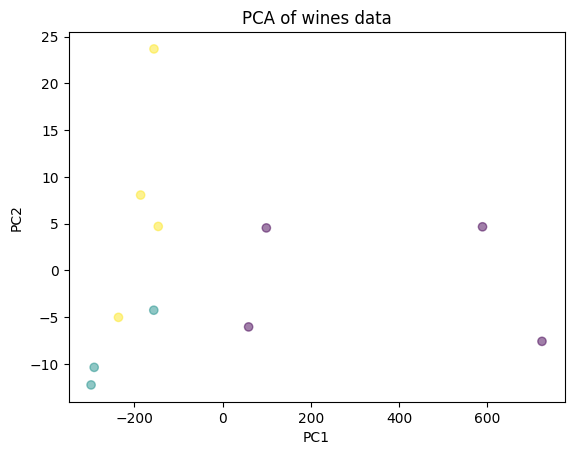

In [131]:
# Load the data
wines = pd.read_csv('wine_missing_labels.csv')

# Drop the missing labels
wines = wines.dropna(subset=['Label'])

# PCA the data to make it two-dimensional
pca = PCA(n_components=2)
wines_2d = pca.fit_transform(wines)

# Plot the scatter plot of the data in 2D
plt.scatter(wines_2d[:, 0], wines_2d[:, 1], c=wines['Label'], alpha=0.5)

# Add labels to the points
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of wines data')
plt.show()


<div style="color: skyblue;">
As we can see, all of these clusters have at least a common direction in the plot. Green labels have both low PCA1 and PCA2 values, yellow labels have low PC1 values but primarily higher PC2 values. The purple labels have primarily higher PC1 values, but fall between the yellow and green PC2 values. I think we can claim that they share clusters together.

Your task is to use clustering to assign labels to the rows that have a missing value as their label. Do this by first clustering all of the data, and then filling in the missing labels based on which clusters the data points with known labels tend to fit in. 

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process.

<br>

You are also given the full labels for the dataset in a separate file called `wine_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook without further understanding of it. 

*Hint: you should get something over 0.8*

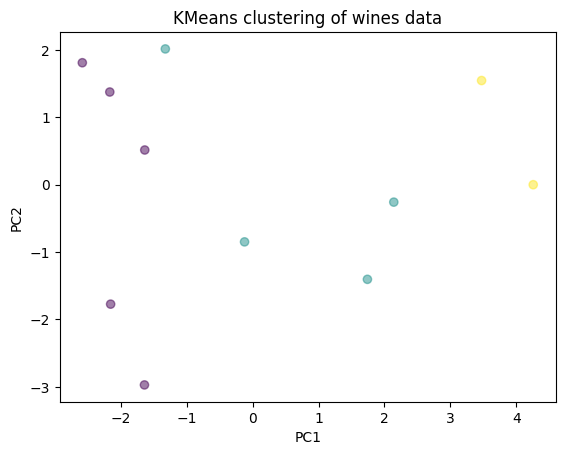

In [132]:
# Z-score standardize the data
scaler = StandardScaler()
wines_standardized = scaler.fit_transform(wines.drop(columns=['Label']))

# Define the number of clusters
num_clusters = 3

# Perform the clustering. Here I am going to use Kmeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=111)
wines['cluster'] = kmeans.fit_predict(wines_standardized)

cluster_labels = wines.dropna(subset=['Label'])
cluster_mode = cluster_labels.groupby('cluster')['Label'].agg(lambda x: x.mode()[0])

for cluster in cluster_mode.index:
    wines.loc[wines['cluster'] == cluster, 'Label'] = wines.loc[wines['cluster'] == cluster, 'Label'].fillna(cluster_mode[cluster])

# Perform the PCA
pca = PCA(n_components=2)
wines_2d = pca.fit_transform(wines_standardized)

# Plot the scatter plot of the data in 2D
plt.scatter(wines_2d[:, 0], wines_2d[:, 1], c=wines['cluster'], alpha=0.5)

# Add labels to the points
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans clustering of wines data')
plt.show()

<div style="color: skyblue;">
YOUR ANSWER

## References:

[1] https://www.xlstat.com/en/solutions/features/agglomerative-hierarchical-clustering-ahc

[2] DATAtab, Hierarchical Cluster Analysis [Simply explained], (https://www.youtube.com/watch?v=8QCBl-xdeZI)

[3] How to Compute Silhouette Coefficient – K Means Clustering in Machine Learning by Mahesh Huddar, https://www.youtube.com/watch?v=FGXkbawTHRQ

[4] https://en.wikipedia.org/wiki/Silhouette_(clustering)

[5] https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.calinski_harabasz_score.html

[6] https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.davies_bouldin_score.html